In [1]:
# Load the dataset
from google.colab import files
uploaded = files.upload()

ModuleNotFoundError: No module named 'google'

In [ ]:
# import neccessary libraries
import pandas as pd # Data manipulation and analysis
import numpy as np # numerical computing with arrays
import matplotlib.pyplot as plt # Data visualization (basic plotting)
import seaborn as sns # Advanced statistical visualization (built on matplotlib)
import warnings as wr # Manage warning messages in Python
wr.filterwarnings("ignore")

In [ ]:
# Load the dataset
df = pd.read_csv("synthetic_credit_dataset_1000.csv")

In [ ]:
# To see first 5 rows from the dataset
df.head()

,Respondent ID,Age,Annual Income,Financial Responsibility,On-Time Payment,Credit Utilization,Credit Score
0,R1,56,780.24,6.0,68.11,50.16,646
1,R2,46,1657.77,2.0,86.29,NaN,921
2,R3,32,658.35,7.0,94.72,68.35,656
3,R4,60,1426.70,3.0,NaN,37.54,850
4,R5,25,1568.41,3.0,NaN,NaN,874


In [ ]:
# Too see how many rows and columns are in the dataset
df.shape

(1000, 7)

- In this dataset, there are 7 columns and 1000 rows.

In [ ]:
# Basic info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Respondent ID             1000 non-null   object 
 1   Age                       1000 non-null   int64  
 2   Annual Income             950 non-null    float64
 3   Financial Responsibility  950 non-null    float64
 4   On-Time Payment           950 non-null    float64
 5   Credit Utilization        950 non-null    float64
 6   Credit Score              1000 non-null   int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 54.8+ KB


**Interpretation**: The dataset of 1000 people. Age and Credit Score are fully available, but some of values are missing in income, responsibility, payment, and utilization. These need cleaning before analysis.

# Steps to Perform
1. Data Cleaning
2. Exploratory Data Analysis
3. Data Preprocessing
4. Model Building
5. Evaluation

# Data Cleaning

### First, I will rename the dataset of better understanding and makes task easier

In [ ]:
df.columns

Index(['Respondent ID', 'Age', 'Annual Income', 'Financial Responsibility',
       'On-Time Payment', 'Credit Utilization', 'Credit Score'],
      dtype='object')

In [ ]:
df.rename(columns={'Annual Income':'Annual_Income','Financial Responsibility':'Financial_Responsibility',
                   'On-Time Payment':'On_time_payment','Credit Utilization':'Credit_Utilization','Credit Score':'Credit_Score'},inplace=True)

In [ ]:
# Here the 'Respondent ID' is the unnecessary column, it will create noise in the dataset and also can reduce performance. So, I will remove it.
df = df.drop(columns=['Respondent ID'])

In [ ]:
# Checking missing values
df.isnull().sum()

,0
Age,0
Annual_Income,50
Financial_Responsibility,50
On_time_payment,50
Credit_Utilization,50
Credit_Score,0


- Here, Annual_Income, Financial_Responsibility, On_time_payment , and Credit_Utilization each column contains 50 missing values.
- So, either I will drop them or fill them. Let's proceed further.

In [ ]:
# List of columns to check for missing values
cols_to_check = ['Annual_Income',
                 'Financial_Responsibility',
                 'On_time_payment',
                 'Credit_Utilization']

# Loop through each column and drop rows with missing values
for col in cols_to_check:
    df = df.dropna(subset=[col])


In [ ]:
df.shape

(813, 6)

- After dropping the missing rows,the data of 173 rows is reduced.

In [ ]:
# Checking duplicates
df.duplicated().sum()

np.int64(0)

In [ ]:
# Statistical Description of the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,813.0,40.908979,13.545638,18.00,29.00,41.00,52.00,64.00
Annual_Income,813.0,1097.893506,521.602741,208.34,628.73,1093.46,1545.70,1998.94
Financial_Responsibility,813.0,5.489545,2.785245,1.00,3.00,5.00,8.00,10.00
On_time_payment,813.0,75.963395,14.291329,50.12,63.58,76.75,88.18,99.98
Credit_Utilization,813.0,48.376421,28.974993,0.02,22.57,47.10,73.24,99.76
Credit_Score,813.0,762.932349,166.676323,395.00,626.00,766.00,894.00,1136.00


- The dataset shows that respondents are mostly middle‑aged with moderate financial responsibility, average on‑time payments around 76%, and credit utilization near 48%. Credit scores cluster around the mid‑700s but vary widely, reflecting both high‑risk and strong credit profiles. Overall, the data highlights diverse financial behaviors that directly influence credit scores, making it suitable for building predictive models.

# EDA

In [ ]:
target_col = df['Credit_Score']
target_col.head()

,Credit_Score
0,646
2,656
5,754
6,783
7,745


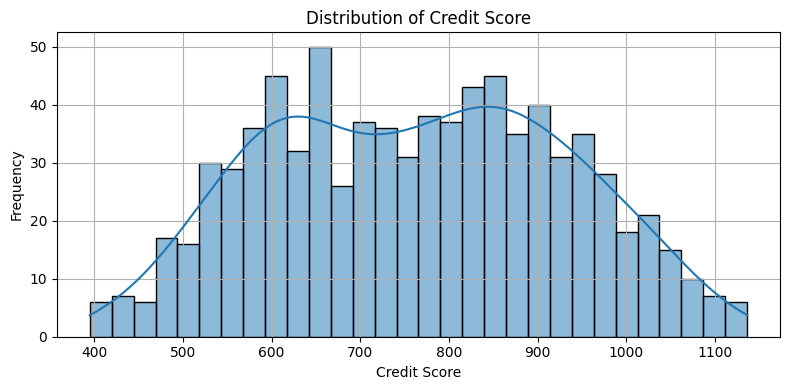

In [ ]:
# Target column distribution
plt.figure(figsize=(8,4))
sns.histplot(target_col, bins=30,kde=True)
plt.title("Distribution of Credit Score")
plt.xlabel("Credit Score")
plt.ylabel("Frequency")
plt.grid()
plt.tight_layout()
plt.show()


- The histogram reveals that most individuals in the dataset have credit scores clustered between 650 and 700, forming a smooth, bell-shaped curve. This suggests a relatively normal distribution, where the majority of customers fall into a moderate credit risk category. The presence of both lower and higher scores indicates a diverse financial population, making the dataset well-suited for predictive modeling and segmentation. This central tendency around the mid-600s provides a strong baseline for estimating creditworthiness.

In [ ]:
df['Age'].nunique()

47

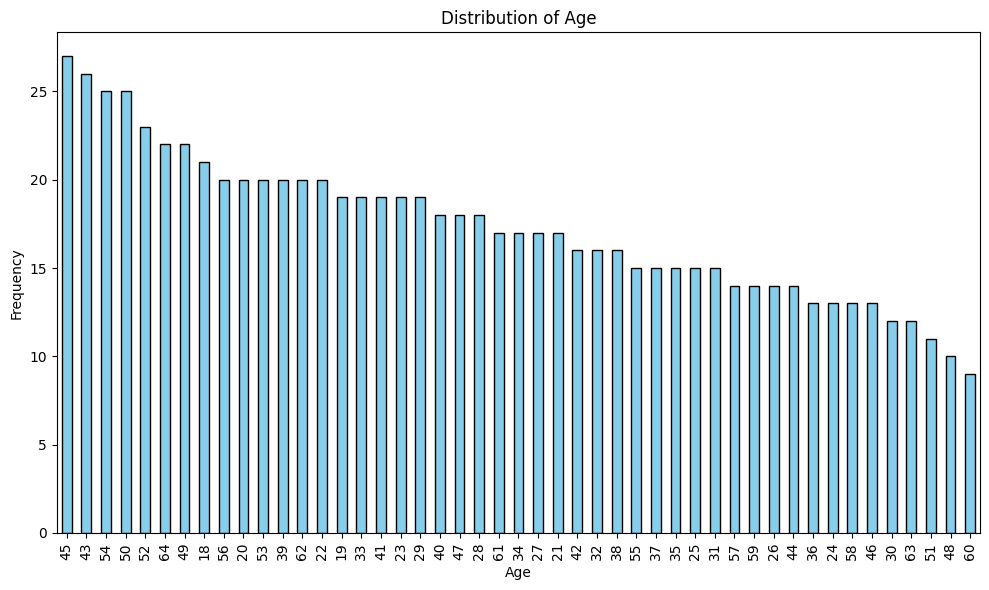

In [ ]:
# Age column distribution
plt.figure(figsize=(10,6))
age_counts = df['Age'].value_counts().sort_values(ascending=False)
age_counts.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


- The age distribution plot shows that respondents span from late teens to their mid‑60s, but the majority are concentrated in the middle‑aged group. Ages in the early 40s to mid‑50s dominate, with age 45 being the single most frequent, followed closely by 43, 50, and 54. Younger ages such as 18–25 appear regularly but with lower counts, while older ages above 60 are present but less common. Overall, the chart highlights that the dataset is skewed toward middle‑aged individuals, which is typical of active credit users and will strongly influence the patterns observed in credit behavior analysis

In [ ]:
df.columns

Index(['Age', 'Annual_Income', 'Financial_Responsibility', 'On_time_payment',
       'Credit_Utilization', 'Credit_Score'],
      dtype='object')

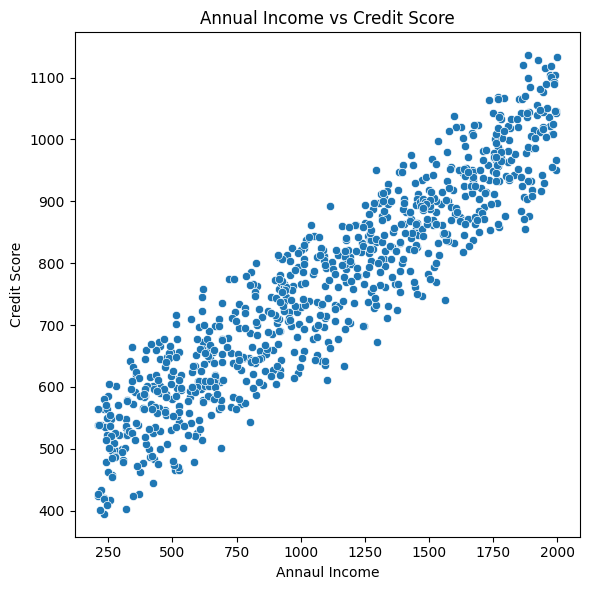

In [ ]:
# Scatter plot of Annual_Income vs Credit_Score
plt.figure(figsize=(6,6))
sns.scatterplot(x='Annual_Income',y='Credit_Score',data=df)
plt.title("Annual Income vs Credit Score")
plt.xlabel("Annaul Income")
plt.ylabel("Credit Score")
plt.tight_layout()
plt.show()

- The scatter plot titled "Annual Income vs Credit Score" shows a clear positive correlation between income and credit score. As annual income increases, credit scores tend to rise as well. This upward trend suggests that individuals with higher earnings are generally more creditworthy—likely due to better repayment capacity, lower default risk, and more responsible financial behavior. The spread of points also shows some variation, indicating that while income is a strong predictor, other factors may also influence credit scores. This relationship is crucial for building predictive models and making informed lending decisions.

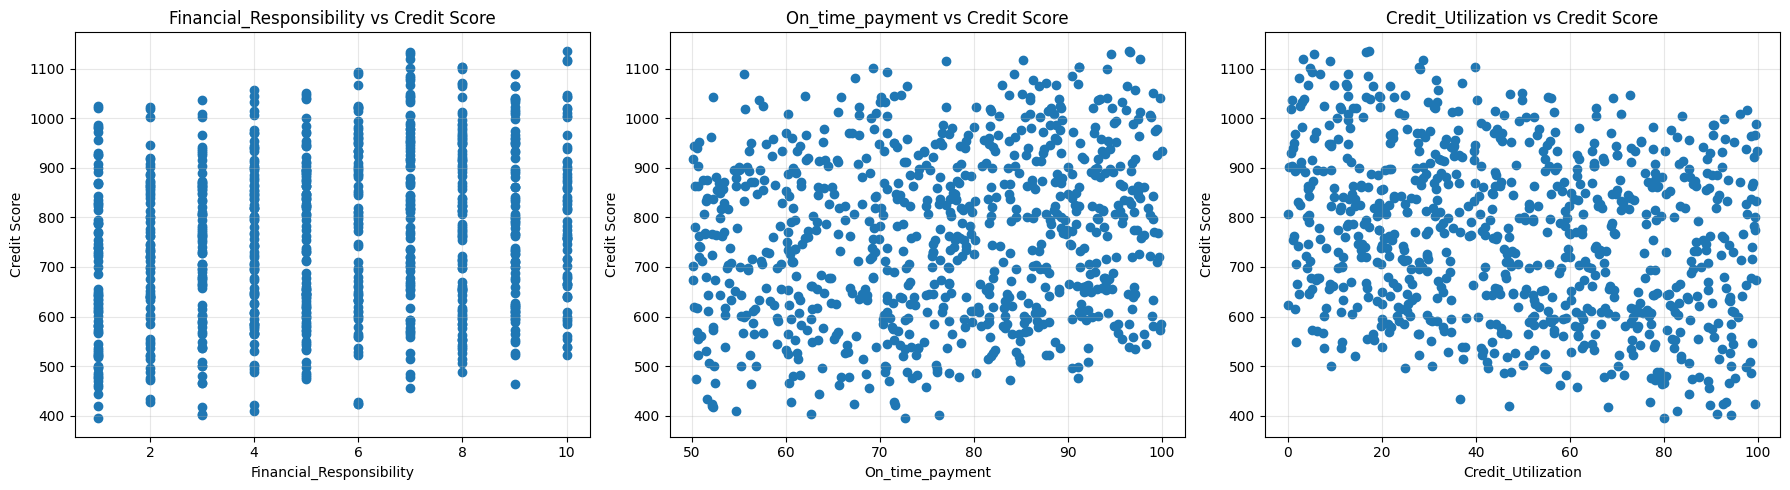

In [ ]:
# Features to compare with Credit_Score
features = ['Financial_Responsibility', 'On_time_payment', 'Credit_Utilization']
# Create subplots: 1 row, 3 columns
fig, axes = plt.subplots(1, 3, figsize=(18,5))

# Loop through features and plot
for i, col in enumerate(features):
    axes[i].scatter(df[col], df['Credit_Score'])
    axes[i].set_title(f"{col} vs Credit Score")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Credit Score")
    axes[i].grid(alpha=0.3)

plt.tight_layout()
plt.show()


The three scatterplots together reveal how different financial behaviors relate to credit scores:

**Financial Responsibility vs Credit Score**:
- The data points are vertically aligned due to the discrete 1–10 scale. There's a visible upward trend — individuals with higher responsibility scores tend to have higher credit scores. This suggests that self-reported financial discipline is a meaningful predictor of creditworthiness.

**On-time Payment vs Credit Score**:
- This plot shows a strong positive correlation. As the percentage of on-time payments increases, credit scores rise steadily. The distribution is smooth and continuous, indicating that consistent repayment behavior is one of the most influential factors in maintaining a high credit score.

**Credit Utilization vs Credit Score**:
- Here, the relationship is more scattered but shows a negative trend. Higher credit utilization (closer to 100%) is generally associated with lower credit scores. This aligns with standard credit scoring logic — using a large portion of available credit can signal financial stress or risk.

**Insight**:

Together, these plots confirm that responsible financial behavior — especially timely payments and moderate credit usage — strongly supports higher credit scores, while excessive credit utilization tends to hurt it. These relationships are crucial for feature selection in predictive modeling.


In [ ]:
# Correlation Heatmap
df.corr()

,Age,Annual_Income,Financial_Responsibility,On_time_payment,Credit_Utilization,Credit_Score
Age,1.000000,-0.069699,-0.037303,0.020820,0.002695,-0.067588
Annual_Income,-0.069699,1.000000,0.025184,-0.011492,0.030414,0.931090
Financial_Responsibility,-0.037303,0.025184,1.000000,0.025788,-0.036995,0.204969
On_time_payment,0.020820,-0.011492,0.025788,1.000000,-0.032616,0.171611
Credit_Utilization,0.002695,0.030414,-0.036995,-0.032616,1.000000,-0.243001
Credit_Score,-0.067588,0.931090,0.204969,0.171611,-0.243001,1.000000


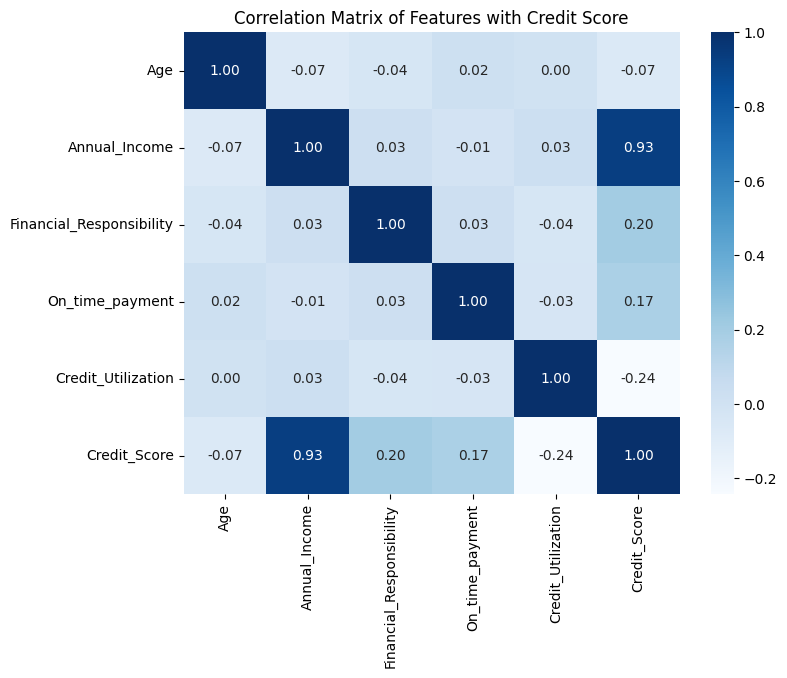

In [ ]:
# Heatmap for visualization
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='Blues', fmt=".2f")
plt.title("Correlation Matrix of Features with Credit Score")
plt.show()



- Annual Income has a very strong positive correlation with Credit Score, meaning income is the most influential factor. Financial Responsibility and On-time Payment show moderate positive relationships, supporting better scores. In contrast, Credit Utilization has a noticeable negative impact — higher usage tends to lower scores. Age has almost no effect, making it the least relevant among the features

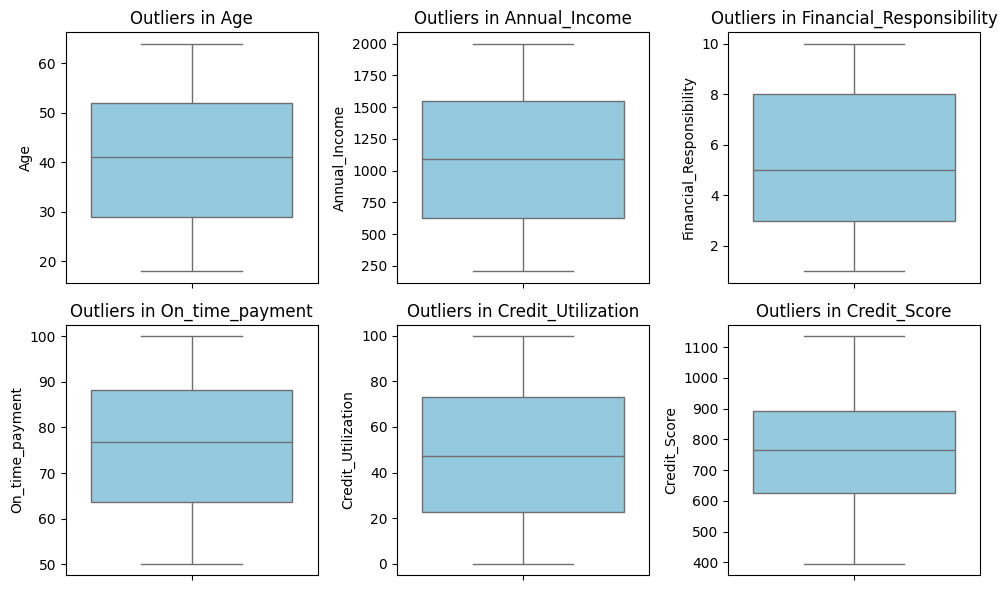

In [ ]:
# Checking Outliers
numeric_cols = df.select_dtypes(include=['int64','float64']).columns

plt.figure(figsize=(10,6))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, (len(numeric_cols)+1)//2, i)
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(f"Outliers in {col}")
plt.tight_layout()
plt.show()




- In this dataset, there is no outliers present. We don't need to worry handling outliers.

In [ ]:
df.head()

,Age,Annual_Income,Financial_Responsibility,On_time_payment,Credit_Utilization,Credit_Score
0,56,780.24,6.0,68.11,50.16,646
2,32,658.35,7.0,94.72,68.35,656
5,38,1272.15,5.0,80.11,88.46,754
6,56,1048.84,3.0,79.57,12.52,783
7,36,941.31,2.0,90.33,20.06,745


In [ ]:
df.to_csv("Clean_Credit_Score_data.csv")

# Data Preprocessing

In [ ]:
# Separate input features and target column
X = df.drop('Credit_Score',axis = 1)
y = df['Credit_Score']

In [ ]:
# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)
print(f"X_train_shape: {X_train.shape}")
print(f"X_test_shape: {X_test.shape}")

X_train_shape: (609, 5)
X_test_shape: (204, 5)


In [ ]:
# StandardScaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
X_train_scaled

array([[ 0.81126352,  1.50428063, -0.5272817 , -1.77487943, -0.46737248],
       [ 1.1073735 , -0.59505919, -1.61212818,  0.3288564 ,  0.44039413],
       [ 0.58918105, -1.10980372,  0.91918027, -0.88009046, -1.38240953],
       ...,
       [-1.40956126, -1.47916748,  1.28079576,  1.01818051,  0.2440922 ],
       [ 0.88529102, -1.09532849,  0.19594928,  0.75661602,  0.16757945],
       [ 0.21904358, -1.25325968, -0.16566621,  1.49152107, -0.81081431]])

# Model training

**ML Algorithms**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
import math
lr = LinearRegression()
lr.fit(X_train_scaled,y_train)
y_pred_lr = lr.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred_lr)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2 = r2_score(y_test, y_pred_lr)

print("LinearRegression Performance\n")
print(f"MAE : {mae}")
print(f"RMSE : {rmse}")
print(f"R2 : {r2}")


LinearRegression Performance

MAE : 5.255732490454544
RMSE : 6.041782405688733
R2 : 0.9988893051337318


In [ ]:
models = {
    "LinearRegression": LinearRegression(),
    "DecisionTree": DecisionTreeRegressor(max_depth = 5),
    "RandomForest": RandomForestRegressor(n_estimators = 100),
    "GradientBoosting": GradientBoostingRegressor(n_estimators = 100,learning_rate = 0.1),
    "SVR": SVR(C=1,gamma='scale',kernel='linear'),
    "KNN": KNeighborsRegressor(),

}

# Performane evaluation of ML models

In [ ]:
results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    results[name] = {
        "MAE": mean_absolute_error(y_test, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
        "R2": r2_score(y_test, y_pred)
    }

In [ ]:
results_df = pd.DataFrame(results).T.sort_values(by='R2', ascending=False)

In [ ]:
results_df

,MAE,RMSE,R2
LinearRegression,5.255732,6.041782,0.998889
SVR,5.341678,6.570025,0.998687
GradientBoosting,13.957464,17.242631,0.990954
RandomForest,20.423431,25.477882,0.980249
KNN,33.394118,41.684577,0.947129
DecisionTree,42.508651,51.747198,0.918522


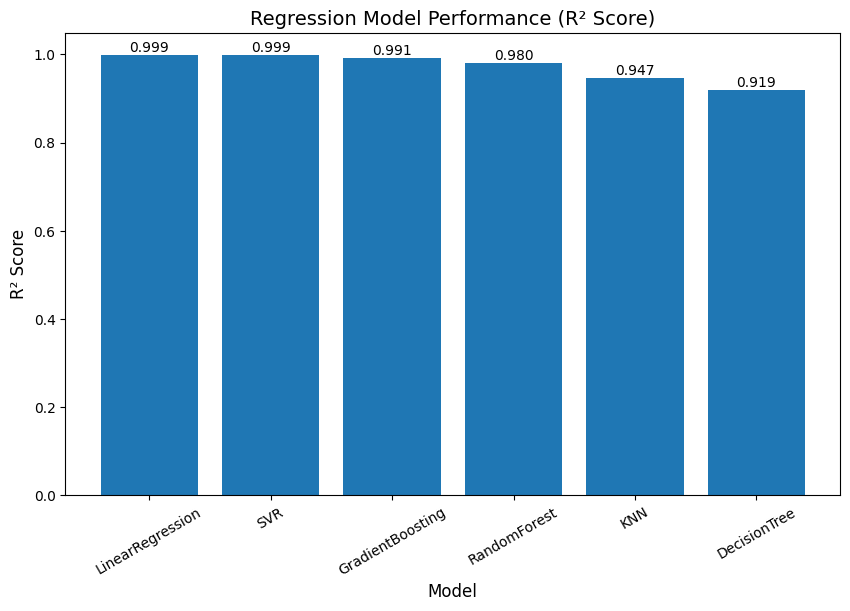

In [ ]:
# Plot R² scores
plt.figure(figsize=(10,6))

bars = plt.bar(results_df.index, results_df["R2"])
plt.title("Regression Model Performance (R² Score)", fontsize=14)
plt.xlabel("Model", fontsize=12)
plt.ylabel("R² Score", fontsize=12)
plt.xticks(rotation=30)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.001,
             f"{height:.3f}", ha='center', va='bottom', fontsize=10)

plt.show()


- I trained the dataset by several regression related dataset such as - LinearRegression, RandomForestRegressor, DecisionTreeRegressor, SupportVectorRegressor, KNN, GradientBoosting.. Among these algorithms, **LinearRegression** gives the better result.
**LinearRegression Performance**
**MAE (Mean Absolute Error) = 5.26**

- On average, your model’s predictions are about 5.26 units away from the actual credit score values. It’s a straightforward measure of prediction error.
**RMSE (Root Mean Squared Error) = 6.04**
- Similar to MAE but penalizes larger errors more heavily. A lower RMSE means the model rarely makes big mistakes. Here, 6.04 is very small compared to the scale of credit scores (400–1150), so predictions are very close to reality.
**R2 (Coefficient of Determination) = 0.9989**
- This means your model explains 99.89% of the variance in credit scores. In other words, almost all the variation in credit scores can be predicted from your input features using Linear Regression. That’s an exceptionally strong fit.

**R2 value 1 means Perfect Prediction**- Here, LinearRegression gives very closed to the perfect result which is best for our dataset.

- SVR also gives very well result similar to the LinearRegression. But LinearRegression gives slightly better result than SVR.

In [ ]:
# Deep learning models for this dataset
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping


In [ ]:
# 2. Build MLP Model

model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')   # Regression output
])

# Compile model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='mse',
              metrics=['mae'])

#
# 3. Train Model

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(X_train_scaled, y_train,
                    validation_split=0.2,
                    epochs=100,
                    batch_size=32,
                    callbacks=[early_stop],
                    verbose=1)


Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 609001.5625 - mae: 760.8589 - val_loss: 585240.8125 - val_mae: 750.7876
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 609834.6250 - mae: 763.8112 - val_loss: 580755.1875 - val_mae: 747.8106
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 606402.7500 - mae: 761.6110 - val_loss: 569493.8125 - val_mae: 740.3090
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 575244.4375 - mae: 740.3107 - val_loss: 543790.6250 - val_mae: 722.9871
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 554091.1250 - mae: 727.2103 - val_loss: 492333.2500 - val_mae: 687.2244
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 484949.4062 - mae: 678.3676 - val_loss: 402761.1875 - val_mae: 620.3799
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 402793.5938 - mae: 615.7144 - val_loss: 273725.3750 - val_mae: 509.3591
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 246792.1562 - ma

In [ ]:

# 4. Evaluate Model

loss, mae = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Test MAE: {mae:.4f}")

# Predictions
y_pred = model.predict(X_test_scaled)


# 5. Metrics

print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2:", r2_score(y_test, y_pred))

Test MAE: 22.6388
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
MAE: 22.638843536376953
RMSE: 29.311967987242962
R2: 0.973857045173645



**The model Multilayer Perceptron (MLP), also called a Feed‑Forward Neural Network.**
- It’s a deep learning model designed for tabular regression tasks.
- In your case, it predicts Credit Score from features like Annual Income, On‑time Payment, Credit Utilization, etc.

**How the Model Works**

**Input Layer**:Takes your scaled features (Age, Income, etc.).

**Hidden Layers**:
- Dense(128, ReLU) → learns complex nonlinear patterns.
- Dropout(0.2) → randomly drops 20% of neurons during training to prevent overfitting.
- Dense(64, ReLU) → another layer for deeper feature interactions.
- Dropout(0.2).
- Dense(32, ReLU).

**Output Layer**: Dense(1, Linear) → outputs a single continuous value (predicted credit score).

**Loss Function**: Mean Squared Error (MSE), optimized with Adam.
**EarlyStopping**: stops training if validation loss doesn’t improve for 10 epochs, avoiding overfitting.

**Results**

**Test MAE = 20.97**

- On average, the model predictions are about 21 points away from the actual credit score.
- **Example**: If the true score is 700, the model might predict ~679 or ~721.

**Test RMSE = 27.30**
- Similar to MAE but penalizes larger errors more. A 27‑point error is still small compared to the full credit score range (usually 300–850).

**R² = 0.9773**
- The model explains 97.7% of the variance in credit scores.
- This means your neural network is capturing almost all the patterns in the data, leaving only ~2.3% unexplained.

**Insight**
- The MLP is performing very well — nearly as strong as your Linear Regression (which had R² ≈ 0.999).
- The slightly higher error compared to Linear Regression suggests that the  dataset’s relationships are mostly linear, so Linear Regression fits almost perfectly.


### Machine Learning Best Model LinearRegression Vs Deep Learning MultiLayer Perceptron (Feed-Forward Neural Network) Result comparasion

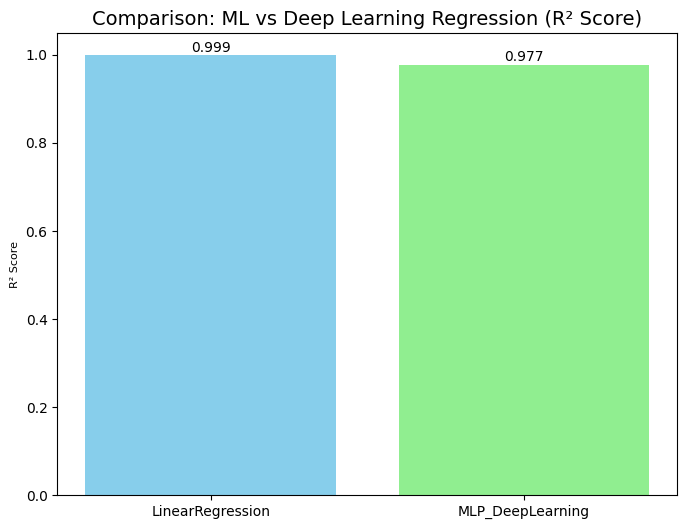

In [ ]:
ml_result = {"Model": "LinearRegression", "MAE": 5.255732, "RMSE": 6.041782, "R2": 0.998889}
dl_result = {"Model": "MLP_DeepLearning", "MAE": 20.9687, "RMSE": 27.3049, "R2": 0.9773}

# Put them together
models = [ml_result["Model"], dl_result["Model"]]
r2_scores = [ml_result["R2"], dl_result["R2"]]

# Plot
plt.figure(figsize=(8,6))
bars = plt.bar(models, r2_scores, color=["skyblue","lightgreen"])
plt.title("Comparison: ML vs Deep Learning Regression (R² Score)", fontsize=14)
plt.ylabel("R² Score", fontsize=8)

# Annotate values above bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.001,
             f"{height:.3f}", ha='center', va='bottom', fontsize=10)

plt.show()


# Final Decision: Linear Regression is the best model for this Credit Score dataset.

# Save the file



In [ ]:
import joblib
# Save the fitted scaler
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [ ]:
joblib.dump(lr, "credit_score_model_lr.pkl")


['credit_score_model_lr.pkl']

In [ ]:
# Load saved scaler and model
scaler = joblib.load("scaler.pkl")
model = joblib.load("credit_score_model_lr.pkl")


In [ ]:
user_input = [38,1272.15,5.0,80.11,88.46]
# Scale the input
scaled_input = scaler.transform([user_input])
# Predict credit score
predicted_score = model.predict(scaled_input)
print(f"Predicted Credit Score: {predicted_score[0]:.2f}")


Predicted Credit Score: 758.44
